In [1]:
import sys 
# sys.path.append('/Users/geenaildefonso/Projects/NERM')
sys.path.append('../../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
# print(sys.path)
from model_files.nerm import model as model
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
# from necro_pydream_model_file_8920 import model
from pysb.simulator import ScipyOdeSimulator
import numpy as np
from scipy.stats import norm,uniform
import seaborn as sns
from matplotlib import pyplot as plt
import random
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from scipy import stats
from pysb.simulator import SimulationResult
import pandas as pd
import seaborn as sns
os.environ["OPENBLAS_NUM_THREADS"] = "1"

In [104]:
print(len(mode1_100))
print(len(mode2_100))
print(len(mode3_100))
print(len(mode4_100))

3644
1492
2042
2822


In [2]:
mode1_100 = np.load('../../param_files/necro_pars10k_cluster0_5720_mod.npy')
mode2_100 = np.load('../../param_files/necro_pars10k_cluster1_5720_mod.npy')
mode3_100 = np.load('../../param_files/necro_pars10k_cluster2_5720_mod.npy')
mode4_100 = np.load('../../param_files/necro_pars10k_cluster3_5720_mod.npy')
pars = np.load('../../param_files/necro_pars10k_allclusmod.npy')

In [3]:
tspan = np.linspace(0, 1440, 1441)

In [11]:
solverwtm3 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm3 = solverwtm3.run(param_values=mode3_100, num_processors = 20)
m3alldf100wt = wtm3.dataframe

2021-12-08 17:41:43.755 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2021-12-08 17:41:43.770 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2021-12-08 17:41:43.847 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2021-12-08 17:41:44.008 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2021-12-08 17:43:20.551 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2021-12-08 17:43:20.553 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2021-12-08 17:43:22.461 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


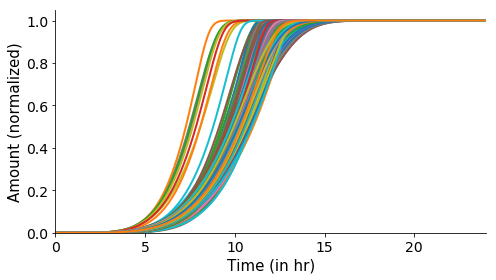

In [13]:
fig, ax = plt.subplots(figsize = (7, 4))
for n in range(len(mode3_100)):
    plt.plot(tspan/60, m3alldf100wt.loc[n]['MLKLa_obs'].iloc[:]/m3alldf100wt['MLKLa_obs'].iloc[:].max(),label = 'pMLKL', lw=2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
# ax.set_xticks([0, 5, 10, 15, 20, 24])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode3_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 

In [47]:
solverlubackdm1 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
lubackdm1 = solverlubackdm1.run(initials = {m.LUBAC(brip=None):726}, param_values=mode3_100, num_processors = 20)
m1alldf100lubackd = lubackdm1.dataframe

2022-01-04 14:32:06.416 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-04 14:32:06.426 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-04 14:32:06.493 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-04 14:32:06.644 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-04 14:33:41.494 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-04 14:33:41.496 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-04 14:33:42.808 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [40]:
solverlubacoem1 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
lubacoem1 = solverlubacoem1.run(initials = {m.LUBAC(brip=None):722600}, param_values=mode3_100, num_processors = 20)
m1alldf100lubacoe = lubacoem1.dataframe

2022-01-04 14:26:56.311 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-04 14:26:56.316 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-04 14:26:56.349 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-04 14:26:56.472 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-04 14:28:31.579 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-04 14:28:31.581 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-04 14:28:32.768 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


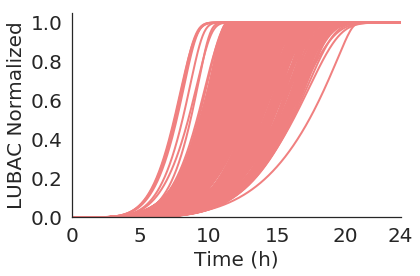

In [48]:
fig, ax = plt.subplots(figsize = (6, 4))
for n in range(len(mode3_100)):
    plt.plot(tspan/60, m1alldf100lubackd.loc[n]['MLKLa_obs'].iloc[:]/m1alldf100lubackd['MLKLa_obs'].iloc[:].max(),
             color = 'lightcoral', lw=2)
plt.xlabel("Time (h)", fontsize=20)
plt.ylabel("LUBAC Normalized", fontsize=20)
plt.xlim(xmin = 0, xmax = 16)
plt.ylim(ymin = 0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
plt.tight_layout()
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('mode1_pmlkl_allpars_redcolor_nogrid.pdf')
plt.show() 

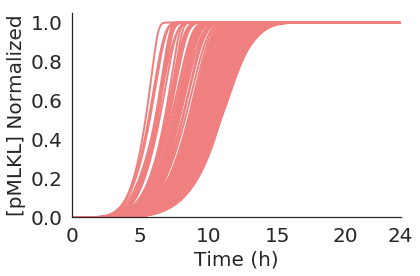

In [46]:
fig, ax = plt.subplots(figsize = (6, 4))
for n in range(len(mode2_100)):
    plt.plot(tspan/60, m1alldf100lubacoe.loc[n]['MLKLa_obs'].iloc[:]/m1alldf100lubacoe['MLKLa_obs'].iloc[:].max(),
             color = 'lightcoral', lw=2)
plt.xlabel("Time (h)", fontsize=20)
plt.ylabel("[pMLKL] Normalized", fontsize=20)
plt.xlim(xmin = 0, xmax = 16)
plt.ylim(ymin = 0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
plt.tight_layout()
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('mode1_pmlkl_allpars_redcolor_nogrid.pdf')
plt.show() 

In [51]:
mode2 = []
clus_idxs = np.array(range(wtm3.nsims))
for idx in clus_idxs: 
    mlkl_traj = wtm3.observables[idx]['MLKLa_obs']
    ysim_mlkl_norm = mlkl_traj / np.nanmax(mlkl_traj)
    st, sc, sk = scipy.interpolate.splrep(tspan, ysim_mlkl_norm)
    try:
        t10 = scipy.interpolate.sproot((st, sc - 0.10, sk))[0]
        t90 = scipy.interpolate.sproot((st, sc - 0.90, sk))[0]
    except IndexError:
        t10 = 0
        t90 = 0

    # time of death  = halfway point between 10 and 90%
    td = (t10 + t90) / 2
    mode2.append(td)

In [52]:
mode2_lubacoe = []
clus_idxs = np.array(range(lubackdm1.nsims))
for idx in clus_idxs: 
    mlkl_traj = lubackdm1.observables[idx]['MLKLa_obs']
    ysim_mlkl_norm = mlkl_traj / np.nanmax(mlkl_traj)
    st, sc, sk = scipy.interpolate.splrep(tspan, ysim_mlkl_norm)
    try:
        t10 = scipy.interpolate.sproot((st, sc - 0.10, sk))[0]
        t90 = scipy.interpolate.sproot((st, sc - 0.90, sk))[0]
    except IndexError:
        t10 = 0
        t90 = 0

    # time of death  = halfway point between 10 and 90%
    td = (t10 + t90) / 2
    mode2_lubacoe.append(td)

In [53]:
mode2_lubackd = []
clus_idxs = np.array(range(lubacoem1.nsims))
for idx in clus_idxs: 
    mlkl_traj = lubacoem1.observables[idx]['MLKLa_obs']
    ysim_mlkl_norm = mlkl_traj / np.nanmax(mlkl_traj)
    st, sc, sk = scipy.interpolate.splrep(tspan, ysim_mlkl_norm)
    try:
        t10 = scipy.interpolate.sproot((st, sc - 0.10, sk))[0]
        t90 = scipy.interpolate.sproot((st, sc - 0.90, sk))[0]
    except IndexError:
        t10 = 0
        t90 = 0

    # time of death  = halfway point between 10 and 90%
    td = (t10 + t90) / 2
    mode2_lubackd.append(td)

TypeError: distplot() got multiple values for keyword argument 'multiple'

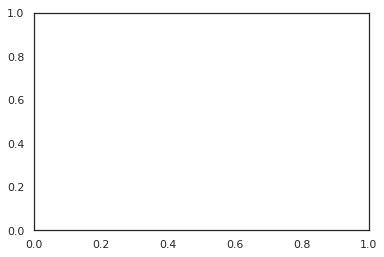

In [65]:
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.5}, kde_kws={'linewidth':2}, multiple="dodge")
# print('clus', np.mean(CI_k63))
# print('clus', np.std(CI_k63))
fig, ax = plt.subplots()
# sns.distplot(mode2, label ='WT',color="dodgerblue",multiple="stack") ,bins=100, **kwargs, kde = False)
sns.distplot(mode2_lubacoe, label = 'cIAP OE',color="deeppink",multiple="stack", bins=100, **kwargs, kde = False)
sns.distplot(mode2_lubackd, label = 'cIAP KD',color="orange",multiple="stack", bins=100, **kwargs, kde = False)
# sns.distplot(CI_a20, label='uncluster',color="orange", bins=25, **kwargs)
# sns.distplot(CI_cyld, label='uncluster',color="deeppink", bins=25, **kwargs)
plt.xlabel('Time (h)')
plt.ylabel('Frequency')
plt.legend(loc = 'best')
plt.xlim(xmin = 400, xmax = 1000)
# plt.ylim(ymax = 0.04)
# plt.xticks([0, 5, 10, 15, 20, 24])
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
# plt.savefig('k63_necrosome_pmlkl.pdf')
plt.show()

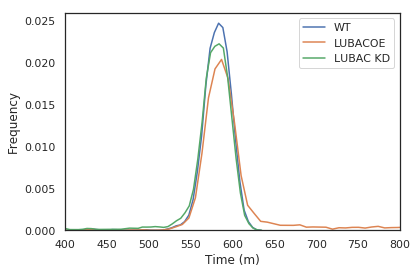

In [103]:
# sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=.25)
kwargs = dict(hist_kws={'alpha':.5}, kde_kws={'linewidth':2})
# Assign colors for each airline and the names
colors = ['green', 'red', 'blue']
names = ['Mode2', 'LubacOE', 'LUBACKD']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
sns.distplot(mode2, label ='WT', kde = True, hist = False)
sns.distplot(mode2_lubacoe, label ='LUBACOE', kde = True, hist = False)
sns.distplot(mode2_lubackd, label = 'LUBAC KD', kde = True, hist = False)

# Plot formatting
plt.legend()
plt.xlabel('Time (m)')
plt.ylabel('Frequency')
plt.xlim(xmin = 400, xmax = 800)
plt.show()

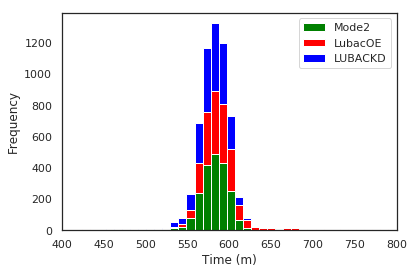

In [90]:
# Assign colors for each airline and the names
colors = ['green', 'red', 'blue']
names = ['Mode2', 'LubacOE', 'LUBACKD']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([mode2, mode2_lubacoe,mode2_lubackd], stacked=True, bins = 100,normed=False,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Time (m)')
plt.ylabel('Frequency')
plt.xlim(xmin = 400, xmax = 800)
plt.show()

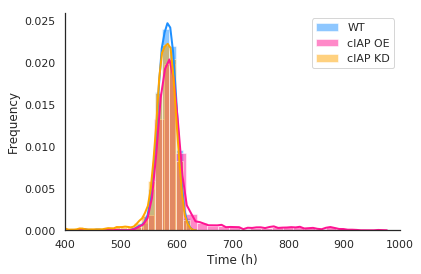

In [59]:
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.5}, kde_kws={'linewidth':2})
# print('clus', np.mean(CI_k63))
# print('clus', np.std(CI_k63))
fig, ax = plt.subplots()
sns.distplot(mode2, label ='WT',color="dodgerblue", bins=50, **kwargs, kde = True)
sns.distplot(mode2_lubacoe, label = 'cIAP OE',color="deeppink", bins=50, **kwargs, kde = True)
sns.distplot(mode2_lubackd, label = 'cIAP KD',color="orange", bins=50, **kwargs, kde = True)
# sns.distplot(CI_a20, label='uncluster',color="orange", bins=25, **kwargs)
# sns.distplot(CI_cyld, label='uncluster',color="deeppink", bins=25, **kwargs)
plt.xlabel('Time (h)')
plt.ylabel('Frequency')
plt.legend(loc = 'best')
plt.xlim(xmin = 400, xmax = 1000)
# plt.ylim(ymax = 0.04)
# plt.xticks([0, 5, 10, 15, 20, 24])
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
# plt.savefig('k63_necrosome_pmlkl.pdf')
plt.show()

In [4]:
solverwtm3 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm3 = solverwtm3.run(param_values=mode3_100[0], num_processors = 20)
m3df100wt = wtm3.dataframe

2021-12-07 16:50:28.979 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2021-12-07 16:50:29.694 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2021-12-07 16:50:29.800 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2021-12-07 16:50:29.851 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2021-12-07 16:50:30.138 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2021-12-07 16:50:30.140 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2021-12-07 16:50:30.207 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


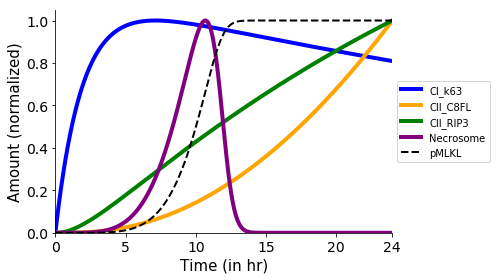

In [10]:
fig, ax = plt.subplots(figsize = (7, 4))
plt.plot(tspan/60, m3df100wt['CI_k63_obs'].iloc[:]/m3df100wt['CI_k63_obs'].iloc[:].max(), label = 'CI_k63',color = 'blue', lw=4)
plt.plot(tspan/60, m3df100wt['CII_C8a_obs'].iloc[:]/m3df100wt['CII_C8a_obs'].iloc[:].max(), label = 'CII_C8FL',color = 'orange',lw=4)
plt.plot(tspan/60, m3df100wt['CII_RIP3_obs'].iloc[:]/m3df100wt['CII_RIP3_obs'].iloc[:].max(), label = 'CII_RIP3',color = 'green',lw=4)
plt.plot(tspan/60, m3df100wt['RIP1RIP3unmod_obs'].iloc[:]/m3df100wt['RIP1RIP3unmod_obs'].iloc[:].max(), label = 'Necrosome',color = 'purple',lw=4)
plt.plot(tspan/60, m3df100wt['MLKLa_obs'].iloc[:]/m3df100wt['MLKLa_obs'].iloc[:].max(),label = 'pMLKL', linestyle = '--',color = 'black',lw=2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)

ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode3_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 

In [21]:
m = model.components
tspan = np.linspace(0,1800,500)
threshold = 2772

In [22]:
solverwtm3 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm3 = solverwtm3.run(param_values=mode3_100, num_processors = 20)
m3alldf100wt = wtm3.dataframe

2022-01-03 15:05:18.762 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-03 15:05:18.773 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-03 15:05:18.841 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-03 15:05:19.002 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-03 15:06:56.721 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-03 15:06:56.723 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-03 15:06:57.878 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


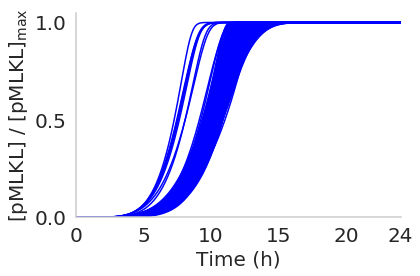

In [108]:
fig, ax = plt.subplots(figsize = (6, 4))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
for n in range(len(mode2_100)):
    plt.plot(tspan/60, m3alldf100wt.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, 
             zorder = 1, color = 'blue')
# colormap = plt.cm.Reds #nipy_spectral, Set1,Paired   
# colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines))]
# for i,j in enumerate(ax.lines):
#     j.set_color(colors[i])
# ax1.legend(loc=2)    
plt.xlabel("Time (h)", fontsize=20)
plt.ylabel(r"[pMLKL] / [pMLKL]$_\mathrm{max}$", fontsize=20)
plt.xlim(xmin = 0, xmax = 16)
plt.ylim(ymin = 0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.set_yticks([0, 0.5, 1.0])
plt.tight_layout()
plt.savefig('mode4_pmlkl_allpars_bluecolor_nogrid.pdf')
plt.show() 

In [17]:
solvera202 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
a20clus2 = solvera202.run(initials = {m.A20(brip = None):0},
                         param_values=mode3_100, num_processors = 20)
# a20clus1.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c1parsmod_30hra20ko.h5',include_obs_exprs = True)
c2df100a202 = a20clus2.dataframe

2022-01-02 21:56:44.282 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-02 21:56:44.292 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-02 21:56:44.358 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-02 21:56:44.517 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-02 21:58:21.181 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-02 21:58:21.182 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-02 21:58:22.520 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


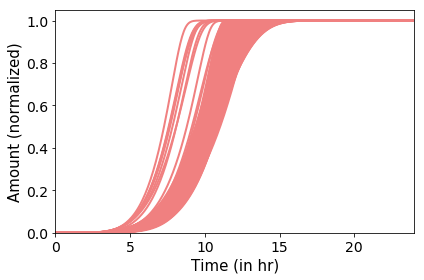

In [25]:
plt.figure()
for n in range(len(mode3_100)):
    plt.plot(tspan/60, c2df100a202.loc[n]['MLKLa_obs'].iloc[:]/c2df100a202['MLKLa_obs'].iloc[:].max(),
             color = 'lightcoral', lw=2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# right_side = ax.spines["right"]
# right_side.set_visible(False)
# top = ax.spines["top"]
# top.set_visible(False)
# plt.xticks([0, 5, 10, 15, 20, 24])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode1e_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 

In [18]:
solvercyld2 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
cyldclus2 = solvercyld2.run(initials = {m.CYLD(brip=None, btraf = None):0},
                         param_values=mode3_100, num_processors = 20)
# cyldclus0.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c0parsmod_30hcyldko.h5',include_obs_exprs = True)
c2df100cyld = cyldclus2.dataframe

2022-01-02 21:58:24.215 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-02 21:58:24.231 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-02 21:58:24.289 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-02 21:58:24.429 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-02 22:00:00.366 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-02 22:00:00.367 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-02 22:00:01.527 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [109]:
solvercylda200 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
cyldclusa200 = solvercylda200.run(initials = {m.CYLD(brip=None, btraf = None):0,m.A20(brip = None):0},
                         param_values=mode3_100, num_processors = 20)
# cyldclus0.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c0parsmod_30hcyldko.h5',include_obs_exprs = True)
c0df100cylda20 = cyldclusa200.dataframe

2022-01-06 22:02:35.212 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-06 22:02:35.221 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-06 22:02:35.293 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-06 22:02:35.496 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-06 22:04:06.617 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-06 22:04:06.619 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-06 22:04:07.809 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [110]:
df_threshtimesc2100cylda20 = c0df100cylda20.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])

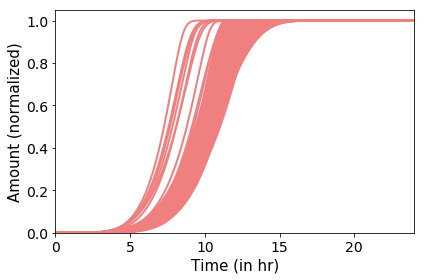

In [24]:
plt.figure()
for n in range(len(mode3_100)):
    plt.plot(tspan/60, c2df100cyld.loc[n]['MLKLa_obs'].iloc[:]/c2df100cyld['MLKLa_obs'].iloc[:].max(),
             color = 'lightcoral', lw=2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# right_side = ax.spines["right"]
# right_side.set_visible(False)
# top = ax.spines["top"]
# top.set_visible(False)
# plt.xticks([0, 5, 10, 15, 20, 24])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode1e_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 

In [27]:
df_threshtimesc2100wt = m3alldf100wt.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc2100a20   = c2df100a202.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc2100cyld = c2df100cyld.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])

In [116]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode1df = pd.DataFrame({'WT': df_threshtimesc2100wt['MLKLa_obs'], 
                          'CYLDKO': df_threshtimesc2100cyld['MLKLa_obs'],
                          'A20KO': df_threshtimesc2100a20['MLKLa_obs'],
                       'CYLDKOA20KO': df_threshtimesc2100cylda20['MLKLa_obs']})
dfclus0n = pd.DataFrame(data = mode1df, columns = ['WT', 'CYLDKO','A20KO', 'CYLD;A20DKO'])
dfclus0n = pd.melt(dfclus0n)

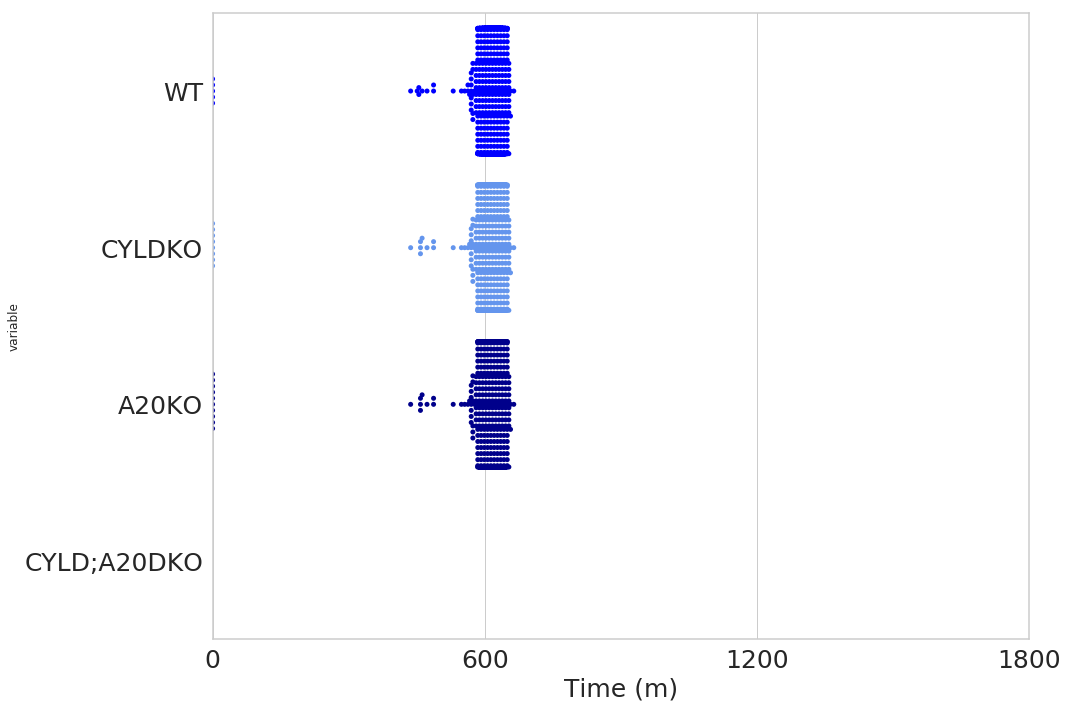

In [122]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize = (15,10))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
# my_pal = {"WT": "mediumaquamarine", "CYLDKO": "limegreen", "A20KO":"darkgreen"}
my_pal = {"WT": "blue", "CYLDKO": "cornflowerblue", "A20KO":"darkblue", 'CYLD;A20DKO': 'skyblue'}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus0n, zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b.set_xlabel("Time (m)",fontsize=25)
plt.xticks(fontsize = 25)
# b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=25)
plt.xlim(xmax = 1800, xmin = 2)
ax.set_xticks([0, 600, 1200, 1800])
plt.tight_layout()
plt.savefig('pmlkl_cylda20dko_100tnf_mode4was2_swarm_bluecolors.pdf')
plt.show()

In [28]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode2df = pd.DataFrame({'WT': df_threshtimesc2100wt['MLKLa_obs'], 
                          'CYLDKO': df_threshtimesc2100cyld['MLKLa_obs'],
                          'A20KO': df_threshtimesc2100a20['MLKLa_obs']})
dfclus2n = pd.DataFrame(data = mode2df, columns = ['WT', 'CYLDKO','A20KO'])
dfclus2n = pd.melt(dfclus2n)

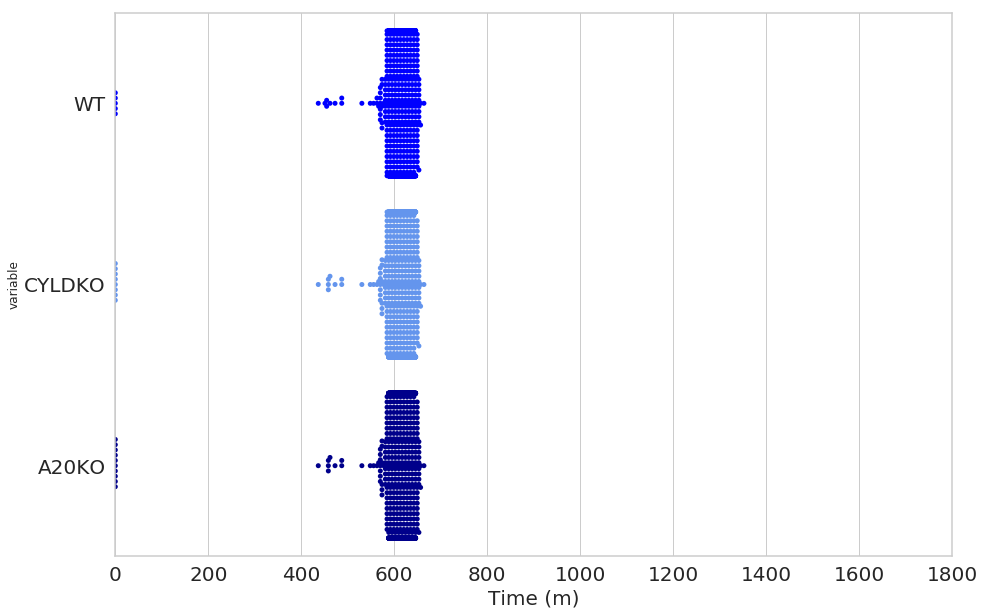

In [105]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize = (15,10))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
# my_pal = {"WT": "mediumaquamarine", "CYLDKO": "limegreen", "A20KO":"darkgreen"}
my_pal = {"WT": "blue", "CYLDKO": "cornflowerblue", "A20KO":"darkblue"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus2n, zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b.set_xlabel("Time (m)",fontsize=20)
plt.xticks(fontsize = 20)
# b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=20)
plt.xlim(xmax = 1800, xmin = 0)
plt.savefig('pmlkl_cyldkoa20ko_100tnf_mode4was2_swarm_bluecolors.pdf')
plt.show()